In [80]:
import os

PRICES_PATH = os.path.join("datasets", "car_price","CarPrice_Assignment.csv")

In [81]:
import pandas as pd

cars = pd.read_csv(PRICES_PATH)
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [83]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


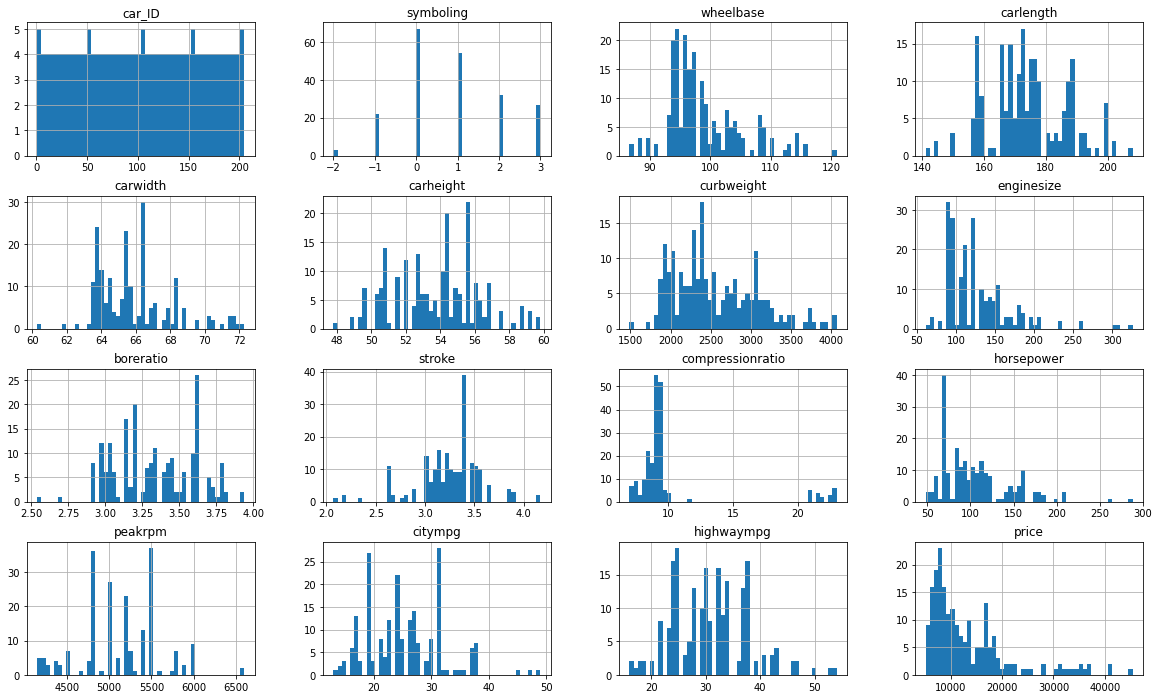

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
cars.hist(bins=50, figsize=(20,12))
plt.show()

In [85]:
# dropping irrelevant columns
cars_cut = cars.copy().drop('car_ID', axis=1)


In [86]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cars_cut, test_size=0.2, random_state=31)
cars = train_set.copy()

In [87]:
import numpy as np
print(np.shape(train_set), np.shape(test_set))

(164, 25) (41, 25)


In [88]:
corr_matrix = cars.corr()
print(corr_matrix['price'].sort_values(ascending=False))
np.shape(corr_matrix)

price               1.000000
enginesize          0.883312
curbweight          0.830958
horsepower          0.816799
carwidth            0.728540
carlength           0.651769
boreratio           0.594446
wheelbase           0.507431
carheight           0.047967
stroke              0.023764
compressionratio    0.016100
peakrpm            -0.038441
symboling          -0.052672
citympg            -0.694057
highwaympg         -0.696988
Name: price, dtype: float64


(15, 15)

In [89]:
cars_labels = train_set['price'].copy()
cars = train_set.drop('price', axis=1)

In [90]:
# cars['vendor'] = pd.Series([name.split()[0] for name in cars['CarName']])
# cars.head()

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


obj_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
            'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
            'fuelsystem']

# cars.columns.values/list(cars) return a columns name
num_cols = [col for col in cars.columns.values if col not in obj_cols]

# cars_num = cars.drop(obj_cols, axis=1)
# cars_cat = cars.drop(num_cols, axis=1)

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

each_col_pipeline = ColumnTransformer(
    [
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, obj_cols),
    ],
    sparse_threshold=0,
)

cars.head()
cars_prepared = each_col_pipeline.fit_transform(cars)
cars_prepared

array([[ 0.08057412,  0.06791253,  0.37270599, ...,  0.        ,
         0.        ,  0.        ],
       [-0.74531063, -0.33297334, -0.48083924, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73234362, -1.55306079, -0.36482338, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.73234362, -1.55306079, -0.36482338, ...,  1.        ,
         0.        ,  0.        ],
       [-0.74531063,  0.8871141 ,  1.69860149, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.08057412, -0.36783298, -0.07478374, ...,  0.        ,
         1.        ,  0.        ]])

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import joblib
from scipy.stats import reciprocal, expon

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Std: ', scores.std())

def save_model_and_scores(model, model_name, scores):
    dir = os.path.join('datasets', 'car_price', 'models')

    if not os.path.exists(dir):
        os.mkdir(dir)
        
    model_filename = model_name + '.pkl'    
    model_path = os.path.join(dir, model_filename)
    joblib.dump(model, model_path)

    scores_filename = model_name + '_scores.csv'
    scores_path = os.path.join(dir, scores_filename)
    np.savetxt(scores_path, scores)
    

## Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_labels)

cars_predictions = lin_reg.predict(cars_prepared)
lin_reg_scores = cross_val_score(lin_reg, cars_prepared, cars_labels,
                                 scoring='neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_reg_rmse_scores)
save_model_and_scores(lin_reg, 'lin_reg', lin_reg_rmse_scores)

Scores:  [ 5995.3750574   8092.5529195   8454.13635138 52465.07829505
 63745.36263915 25445.25606146  5917.11111498  7160.79217471
  4171.72271593  6091.35840197]
Mean:  18753.874573154146
Std:  20640.111583706217


## Decision Tree

In [124]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_prepared, cars_labels)

rand_params = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'min_samples_split': reciprocal(0.01, 1.0),
}

rnd_tree = RandomizedSearchCV(tree_reg, rand_params, n_iter=30,
                              scoring='neg_mean_squared_error',
                              cv=10, return_train_score=True)

rnd_tree.fit(cars_prepared, cars_labels)
best_tree = rnd_tree.best_estimator_
cars_predictions = best_tree.predict(cars_prepared)
best_tree_scores = cross_val_score(best_tree, cars_prepared, cars_labels,
                                 scoring='neg_mean_squared_error', cv=10)
best_tree_rmse_scores = np.sqrt(-best_tree_scores)
display_scores(best_tree_rmse_scores)
save_model_and_scores(best_tree, 'decision_tree', best_tree_rmse_scores)

Scores:  [3550.97492902 2590.182835   3992.82804775 2361.82401427 1767.77697665
 2927.46479073 2016.92939465 3654.32598643 2325.90930661 2697.75945479]
Mean:  2788.5975735886655
Std:  698.6803704818708


## Random Forest 

In [129]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(cars_prepared, cars_labels)

rand_params = {
    'criterion': ["squared_error", "absolute_error", "poisson"],
    'min_samples_split': reciprocal(0.01, 1.0),
}

rnd_forest = RandomizedSearchCV(forest_reg, rand_params, n_iter=30,
                              scoring='neg_mean_squared_error',
                              cv=10, return_train_score=True)

rnd_forest.fit(cars_prepared, cars_labels)
best_forest = rnd_forest.best_estimator_
cars_predictions = best_forest.predict(cars_prepared)
best_forest_scores = cross_val_score(best_forest, cars_prepared, cars_labels,
                                     scoring='neg_mean_squared_error', cv=10)
best_forest_rmse_scores = np.sqrt(-best_forest_scores)
display_scores(best_forest_rmse_scores)
save_model_and_scores(best_forest, 'random_forest', best_forest_rmse_scores)

Scores:  [3302.12658627 2135.83849473 4027.82829567 2207.0073816  2520.90034786
 2244.69537701 1761.85449912 2588.34834669 2194.6069125  2488.71876929]
Mean:  2547.1925010732825
Std:  623.3399558989572


## SVR

In [134]:
from sklearn.svm import SVR 

svr_reg = SVR()
svr_reg.fit(cars_prepared, cars_labels)

rand_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': reciprocal(20, 20000),
    'gamma': expon(scale=1.0),
}

rnd_svr = RandomizedSearchCV(svr_reg, rand_params, n_iter=30,
                              scoring='neg_mean_squared_error',
                              cv=10, return_train_score=True)

rnd_svr.fit(cars_prepared, cars_labels)
best_svr = rnd_svr.best_estimator_
print(rnd_svr.best_params_)
cars_predictions = best_svr.predict(cars_prepared)
best_svr_scores = cross_val_score(best_svr, cars_prepared, cars_labels,
                                     scoring='neg_mean_squared_error', cv=10)
best_svr_rmse_scores = np.sqrt(-best_svr_scores)
display_scores(best_svr_rmse_scores)
save_model_and_scores(best_svr, 'svr', best_svr_rmse_scores)

{'C': 3375.284781405367, 'gamma': 1.6156652968630536, 'kernel': 'linear'}
Scores:  [3601.4840766  2376.96788477 2766.03277154 2171.59808664 2931.05503222
 2880.62520188 1777.78871394 1920.08455377 2676.18665964 4212.84638494]
Mean:  2731.466936593269
Std:  708.8522713721167


## Testing model on test sample

In [139]:
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

X_test_prepared = each_col_pipeline.transform(X_test)

predictions = best_forest.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2378.0575856479268